# KLASIFIKASI PENYAKIT DAUN GANDUM DENGAN MENGGUNAKAN ALGORITMA K NEAREST NEIGHBOR

## Menginstall Library dan Dependencies

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=42b62951b776b6754595bf18756846436718ac3ffddc558c8d2392e8cb434e41
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: idna
    Found e

In [ ]:
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 48.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import shutil
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import itertools
from roboflow import Roboflow

## Memanggil Dataset

In [ ]:
# Mounting Dataset dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir 'klasifikasi-gandum'

In [ ]:
# Mengesktrak Dataset dari bentuk zip ke bentuk file biasa
import zipfile
#zip_ref = zipfile.ZipFile("/content/drive/MyDrive/datasets/70-20-10/daun-gandum.multiclass.zip", 'r') # Skema 1
#zip_ref = zipfile.ZipFile("/content/drive/MyDrive/datasets/60-20-20/daun-gandum.multiclass.zip", 'r') # Skema 2
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/datasets/50-30-20/daun-gandum.multiclass.zip", 'r') # Skema 3
#zip_ref = zipfile.ZipFile("/content/drive/MyDrive/datasets/40-30-30/daun-gandum.multiclass.zip", 'r') # Skema 4
zip_ref.extractall("/content/klasifikasi-gandum")
zip_ref.close()

## Memulai Processing Data

In [ ]:
train_path = "/content/klasifikasi-gandum/train"
test_path = "/content/klasifikasi-gandum/test"
valid_path = "/content/klasifikasi-gandum/valid"

# Rescale foto-foto menggunakan ImageDataGenerator agar ukuran tidak terlalu besar
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

# Tentukan directory data di mana folder berada, lalu klasifikasikan menggunakan mode
train_dataset = train.flow_from_directory(train_path,
                                          target_size=(64,64),
                                          class_mode='categorical')

test_dataset = test.flow_from_directory(test_path,
                                          target_size=(64,64),
                                          class_mode = 'categorical')
validation_dataset = valid.flow_from_directory(valid_path,
                                          target_size=(64,64),
                                          class_mode='categorical')

Found 435 images belonging to 3 classes.
Found 58 images belonging to 3 classes.
Found 88 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'healthy': 0, 'septoria': 1, 'stripe_rust': 2}

## Memasukkan data pada CSV

In [ ]:
# Masukkan data pada csv
import os
import pandas as pd

BASE_DIR = '/content/klasifikasi-gandum/'
category = ['healthy','septoria', 'stripe_rust']

def insertToCsv(category_name, df, mark):
  data_folder = BASE_DIR+f'{mark}/'+f'{category_name}/'
  data_annotation = category_name

  files_in_data = sorted(os.listdir(data_folder))
  files_in_data_annotated = sorted(os.listdir(data_folder))
  images=[i for i in files_in_data if i in files_in_data_annotated]
  df['images'] = [str(x) for x in images]
  df['labels'] = [data_annotation for x in images]
  df.to_csv(f'{mark}_files_{category_name}.csv', header=['images','labels'])

### Untuk Data Train

In [ ]:
# Membuat CSV Kosong
df = pd.DataFrame(columns=['images','labels'])
df2 = pd.DataFrame(columns=['images','labels'])
df3= pd.DataFrame(columns=['images','labels'])

# Memasukkan ke CSV
insertToCsv(category[0],df, 'train')
insertToCsv(category[1],df2, 'train')
insertToCsv(category[2],df3, 'train')

### Untuk Data Test

In [ ]:
# Membuat CSV Kosong
df = pd.DataFrame(columns=['images','labels'])
df2 = pd.DataFrame(columns=['images','labels'])
df3= pd.DataFrame(columns=['images','labels'])

# Memasukkan ke CSV
insertToCsv(category[0],df, 'test')
insertToCsv(category[1],df2, 'test')
insertToCsv(category[2],df3, 'test')

### Untuk Data Valid

In [ ]:
# Membuat CSV Kosong
df = pd.DataFrame(columns=['images','labels'])
df2 = pd.DataFrame(columns=['images','labels'])
df3= pd.DataFrame(columns=['images','labels'])

# Memasukkan ke CSV
insertToCsv(category[0],df, 'valid')
insertToCsv(category[1],df2, 'valid')
insertToCsv(category[2],df3, 'valid')

In [ ]:
# Mencoba membaca Dataset
pd.read_csv('/content/train_files_healthy.csv')

,Unnamed: 0,images,labels
0,0,loh-1-_JPG.rf.25910c7a70986338de2dd6814172ba7d...,healthy
1,1,loh-1-_JPG.rf.57088021afb299fe19c25c35bb4e80d4...,healthy
2,2,loh-1-_JPG.rf.c2e22660f27eccbfb9ed1b751ae72e63...,healthy
3,3,loh-10-_JPG.rf.53782a95e40a94646473ddb84d7c3ce...,healthy
4,4,loh-10-_JPG.rf.8a0a453bcac81dd1675a2abac0974b7...,healthy
...,...,...,...
151,151,loh-83-_JPG.rf.a47e02092980eb53abe81d6cbf90a40...,healthy
152,152,loh-83-_JPG.rf.ed1246f68158b542816089b43a7aedc...,healthy
153,153,loh-9-_JPG.rf.8b0c6fae7cc25469a30b05ed1b12600d...,healthy
154,154,loh-9-_JPG.rf.e871571eb83cea14e5bf5925339cd008...,healthy


In [ ]:
pd.read_csv('/content/train_files_septoria.csv')

,Unnamed: 0,images,labels
0,0,los-10-_JPG.rf.0b34e303a124796a95664eeab1fbfc0...,septoria
1,1,los-10-_JPG.rf.1f2f0207a424a791fbc7f3115cd8511...,septoria
2,2,los-10-_JPG.rf.6e07eca883def8464a22eb69566dcbd...,septoria
3,3,los-14-_JPG.rf.2885a721211ad74fc09db4674bb3521...,septoria
4,4,los-14-_JPG.rf.6533af883ff2232d2790fbfeec7da5e...,septoria
5,5,los-14-_JPG.rf.d773e0953618c401477a6c2f0181858...,septoria
6,6,los-18-_JPG.rf.0b2b336e2f83a862b34a6975d1b3bd7...,septoria
7,7,los-18-_JPG.rf.97c290b83150a5c8241179073fc0bba...,septoria
8,8,los-18-_JPG.rf.feb1ed6339182aafc8ded87ebda87f6...,septoria
9,9,los-20-_JPG.rf.13a3f7c838be0f3e83139f9b46c43e1...,septoria


In [ ]:
pd.read_csv('/content/train_files_stripe_rust.csv')

,Unnamed: 0,images,labels
0,0,lolr-1-_JPG.rf.2df7003263f9ad30f6ee82e8f824b93...,stripe_rust
1,1,lolr-1-_JPG.rf.496706fd7fc2b822a52db0c3117219b...,stripe_rust
2,2,lolr-1-_JPG.rf.fa7ca12f996bc72974167aa8804bace...,stripe_rust
3,3,lolr-10-_JPG.rf.20544863e2de6e10870621e5cb23d5...,stripe_rust
4,4,lolr-10-_JPG.rf.8072bfa28cce5a4239df5439178264...,stripe_rust
...,...,...,...
223,223,lolr-96-_JPG.rf.1d5a0b4992df477c5825c4597db414...,stripe_rust
224,224,lolr-96-_JPG.rf.21b3bcbd724b21f16f2e71ea7d29a7...,stripe_rust
225,225,lolr-97-_JPG.rf.2cdfd50e6dff173eb62be9d27c8057...,stripe_rust
226,226,lolr-97-_JPG.rf.734285823c6841c7f7da4004777d3b...,stripe_rust


In [ ]:
# Membaca CSV Train
df1tr = pd.read_csv('train_files_healthy.csv')
df2tr = pd.read_csv('train_files_septoria.csv')
df3tr = pd.read_csv('train_files_stripe_rust.csv')

df_train = pd.concat([df1tr, df2tr,df3tr], axis=0)
new_df_train = df_train.drop(['Unnamed: 0'], axis=1)
new_df_train

,images,labels
0,loh-1-_JPG.rf.25910c7a70986338de2dd6814172ba7d...,healthy
1,loh-1-_JPG.rf.57088021afb299fe19c25c35bb4e80d4...,healthy
2,loh-1-_JPG.rf.c2e22660f27eccbfb9ed1b751ae72e63...,healthy
3,loh-10-_JPG.rf.53782a95e40a94646473ddb84d7c3ce...,healthy
4,loh-10-_JPG.rf.8a0a453bcac81dd1675a2abac0974b7...,healthy
...,...,...
223,lolr-96-_JPG.rf.1d5a0b4992df477c5825c4597db414...,stripe_rust
224,lolr-96-_JPG.rf.21b3bcbd724b21f16f2e71ea7d29a7...,stripe_rust
225,lolr-97-_JPG.rf.2cdfd50e6dff173eb62be9d27c8057...,stripe_rust
226,lolr-97-_JPG.rf.734285823c6841c7f7da4004777d3b...,stripe_rust


In [ ]:
# Membaca CSV Test
df1ts = pd.read_csv('test_files_healthy.csv')
df2ts = pd.read_csv('test_files_septoria.csv')
df3ts = pd.read_csv('test_files_stripe_rust.csv')

df_test= pd.concat([df1ts, df2ts,df3ts], axis=0)
new_df_test = df_test.drop(['Unnamed: 0'], axis=1)
new_df_test

,images,labels
0,loh-102-_JPG.rf.33579333d6d0df44507ae0a181aed2...,healthy
1,loh-24-_JPG.rf.2646808716fd0c455ef9c31a50f62c5...,healthy
2,loh-29-_JPG.rf.a6bd53c62a6fe415e2873386924092c...,healthy
3,loh-32-_JPG.rf.6bafa01a96fb669ccee6d6c11ef63b3...,healthy
4,loh-39-_JPG.rf.14efd4858ff653d7c619a1a02d6c1ca...,healthy
5,loh-55-_JPG.rf.41a9ace7306f4765f930667191fd820...,healthy
6,loh-74-_JPG.rf.05fcb041d227160e760d957c78ac3e5...,healthy
7,loh-75-_JPG.rf.60e292dbcb806a72983482a4757595f...,healthy
8,loh-76-_JPG.rf.43e4c08e9b98a6708110518a7f364a7...,healthy
9,loh-78-_JPG.rf.c4f7cd2519ea918e775b8078618fb90...,healthy


In [ ]:
# Membaca CSV Valid
df1v = pd.read_csv('valid_files_healthy.csv')
df2v = pd.read_csv('valid_files_septoria.csv')
df3v = pd.read_csv('valid_files_stripe_rust.csv')

df_valid = pd.concat([df1v, df2v,df3v], axis=0)
new_df_valid = df_valid.drop(['Unnamed: 0'], axis=1)
new_df_valid

,images,labels
0,loh-12-_JPG.rf.e67948668d504b3a865437fc241a60c...,healthy
1,loh-13-_JPG.rf.b5f702aec0b76b1ca382b4c9e470829...,healthy
2,loh-15-_JPG.rf.35809cc86774b3c032e0c4b9aff1d8f...,healthy
3,loh-27-_JPG.rf.34f719b720945ba98537496e4a89420...,healthy
4,loh-30-_JPG.rf.6268c3dd8b789de6829b8e779556fad...,healthy
...,...,...
9,lolr-73-_JPG.rf.011f4c12398613e9d87a5d61457fbb...,stripe_rust
10,lolr-81-_JPG.rf.9c459201b39e873d21c5dad9c79ede...,stripe_rust
11,lolr-88-_JPG.rf.935124bd38cd1829aaf31f9f623e92...,stripe_rust
12,lolr-90-_JPG.rf.3b7822c6c47c5e93956a30dba82fbd...,stripe_rust


In [ ]:
import hashlib
import PIL
from PIL import Image
from PIL import ImageStat
def get_image_meta(image_id, image_label, image_src, dataset = new_df_train):
    img = Image.open(image_src)
    extrema = img.getextrema()
    stat = ImageStat.Stat(img)

    meta = {
        'image': image_id,
        'labels':image_label,
        'dataset': dataset,
        'R_min': extrema[0][0],
        'R_max': extrema[0][1],
        'G_min': extrema[1][0],
        'G_max': extrema[1][1],
        'B_min': extrema[2][0],
        'B_max': extrema[2][1],
        'R_avg': stat.mean[0],
        'G_avg': stat.mean[1],
        'B_avg': stat.mean[2],
        'height': img.height,
        'width': img.width,
        'format': img.format,
        'mode': img.mode
    }
    return meta

In [ ]:
from tqdm import tqdm

def image_metadata(df, rootdir, mark):
    img_data = []
    for i, image_id in enumerate(tqdm(df['images'], total=df.shape[0])):
      img_data.append(get_image_meta(image_id, df['labels'][i], (rootdir + '{}'.format(image_id)), mark))
    meta_pd = pd.DataFrame(img_data)
    return meta_pd

In [ ]:
CFG_train = [
    '/content/klasifikasi-gandum/train/healthy/', #[0]
    '/content/klasifikasi-gandum/train/septoria/', #[1]
    '/content/klasifikasi-gandum/train/stripe_rust/' #[2]
    ]

In [ ]:
CFG_test = [
    '/content/klasifikasi-gandum/test/healthy/', #[0]
    '/content/klasifikasi-gandum/test/septoria/', #[1]
    '/content/klasifikasi-gandum/test/stripe_rust/' #[2]
    ]

In [ ]:
CFG_valid = [
    '/content/klasifikasi-gandum/valid/healthy/', #[0]
    '/content/klasifikasi-gandum/valid/septoria/', #[1]
    '/content/klasifikasi-gandum/valid/stripe_rust/' #[2]
    ]

In [ ]:
meta_train = image_metadata(df=df1tr, rootdir=CFG_train[0], mark='train')
meta_train1 = image_metadata(df=df2tr, rootdir = CFG_train[1],mark='train')
meta_train2 = image_metadata(df=df3tr, rootdir = CFG_train[2],mark='train')

100%|██████████| 228/228 [00:03<00:00, 60.50it/s] 


In [ ]:
# Melihat Training Data
meta_train.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,loh-1-_JPG.rf.25910c7a70986338de2dd6814172ba7d...,healthy,train,0,244,0,243,0,238,133.336147,103.052996,82.262495,640,640,JPEG,RGB
1,loh-1-_JPG.rf.57088021afb299fe19c25c35bb4e80d4...,healthy,train,0,252,0,246,0,242,129.944019,93.554570,74.226548,640,640,JPEG,RGB
2,loh-1-_JPG.rf.c2e22660f27eccbfb9ed1b751ae72e63...,healthy,train,58,255,34,255,18,233,143.784111,104.772000,83.149668,640,640,JPEG,RGB
3,loh-10-_JPG.rf.53782a95e40a94646473ddb84d7c3ce...,healthy,train,0,207,0,209,0,184,80.377769,95.707905,65.253027,640,640,JPEG,RGB
4,loh-10-_JPG.rf.8a0a453bcac81dd1675a2abac0974b7...,healthy,train,0,205,0,208,0,190,76.875325,93.170056,58.744023,640,640,JPEG,RGB


In [ ]:
# Melihat Training Data
meta_train1.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,los-10-_JPG.rf.0b34e303a124796a95664eeab1fbfc0...,septoria,train,0,255,0,252,0,255,117.707090,107.764385,111.788662,640,640,JPEG,RGB
1,los-10-_JPG.rf.1f2f0207a424a791fbc7f3115cd8511...,septoria,train,38,255,23,255,8,255,127.657734,114.240723,116.825767,640,640,JPEG,RGB
2,los-10-_JPG.rf.6e07eca883def8464a22eb69566dcbd...,septoria,train,0,255,0,255,0,255,119.886316,108.369541,111.554436,640,640,JPEG,RGB
3,los-14-_JPG.rf.2885a721211ad74fc09db4674bb3521...,septoria,train,62,255,32,255,7,228,139.217415,92.998875,64.479275,640,640,JPEG,RGB
4,los-14-_JPG.rf.6533af883ff2232d2790fbfeec7da5e...,septoria,train,0,255,0,255,0,224,129.906392,87.182461,60.621453,640,640,JPEG,RGB


In [ ]:
# Melihat Training Data
meta_train2.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,lolr-1-_JPG.rf.2df7003263f9ad30f6ee82e8f824b93...,stripe_rust,train,0,255,0,255,0,255,240.277717,240.124141,231.818538,640,640,JPEG,RGB
1,lolr-1-_JPG.rf.496706fd7fc2b822a52db0c3117219b...,stripe_rust,train,110,255,124,255,63,255,242.881094,242.902417,236.665359,640,640,JPEG,RGB
2,lolr-1-_JPG.rf.fa7ca12f996bc72974167aa8804bace...,stripe_rust,train,0,255,0,255,0,255,230.901177,230.781792,222.052021,640,640,JPEG,RGB
3,lolr-10-_JPG.rf.20544863e2de6e10870621e5cb23d5...,stripe_rust,train,21,220,25,218,6,249,182.983875,182.973550,207.894312,640,640,JPEG,RGB
4,lolr-10-_JPG.rf.8072bfa28cce5a4239df5439178264...,stripe_rust,train,0,220,0,218,0,250,171.105110,171.352590,194.126433,640,640,JPEG,RGB


In [ ]:
meta_test = image_metadata(df=df1ts, rootdir = CFG_test[0], mark='test')
meta_test1 = image_metadata(df=df2ts, rootdir = CFG_test[1],mark='test')
meta_test2 = image_metadata(df=df3ts, rootdir = CFG_test[2],mark='test')

100%|██████████| 7/7 [00:00<00:00, 126.41it/s]


In [ ]:
# Melihat Testing Data
meta_test.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,loh-102-_JPG.rf.33579333d6d0df44507ae0a181aed2...,healthy,test,35,187,19,207,18,252,112.105840,142.301531,153.675925,640,640,JPEG,RGB
1,loh-24-_JPG.rf.2646808716fd0c455ef9c31a50f62c5...,healthy,test,26,231,34,228,14,213,112.373071,116.704895,86.637336,640,640,JPEG,RGB
2,loh-29-_JPG.rf.a6bd53c62a6fe415e2873386924092c...,healthy,test,10,219,3,221,0,219,86.940188,98.102703,59.882336,640,640,JPEG,RGB
3,loh-32-_JPG.rf.6bafa01a96fb669ccee6d6c11ef63b3...,healthy,test,17,235,23,234,0,240,105.308027,113.764148,79.717405,640,640,JPEG,RGB
4,loh-39-_JPG.rf.14efd4858ff653d7c619a1a02d6c1ca...,healthy,test,7,255,8,250,0,230,122.401343,124.319421,82.659807,640,640,JPEG,RGB


In [ ]:
# Melihat Testing Data
meta_test1.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,los-13-_JPG.rf.a6963e3c4dfbf59bd8ce11db9b70322...,septoria,test,29,255,10,255,6,242,151.714658,111.525671,84.693594,640,640,JPEG,RGB
1,los-27-_JPG.rf.dae582fb4ae8baa628b2d0a911fa124...,septoria,test,7,255,11,233,17,233,118.527258,113.711782,110.381660,640,640,JPEG,RGB
2,los-37-_JPG.rf.a00fa2f62beff35aeae91997a41dae8...,septoria,test,25,255,52,243,53,221,115.547261,123.715671,137.373794,640,640,JPEG,RGB
3,los-39-_JPG.rf.70c8c7d3e8bd4d87f1b08b8a3301564...,septoria,test,30,255,46,234,26,234,117.289482,117.942283,124.241565,640,640,JPEG,RGB
4,los-4-_JPG.rf.0575c6053e5fc1e0f2dddbf0d6f148f7...,septoria,test,81,255,35,254,11,224,152.315635,100.666028,73.901650,640,640,JPEG,RGB


In [ ]:
# Melihat Testing Data
meta_test2.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,lolr-25-_JPG.rf.af3cef0ae2c05675ff14f5bc5c61df...,stripe_rust,test,7,255,8,243,0,244,95.747729,107.188699,67.907356,640,640,JPEG,RGB
1,lolr-45-_JPG.rf.83f7e0b8124ad70787e35a90caaa8c...,stripe_rust,test,7,255,0,249,0,255,112.534026,114.396887,79.319033,640,640,JPEG,RGB
2,lolr-58-_JPG.rf.684549911e6e8e5111857e5b43d025...,stripe_rust,test,16,255,15,236,10,235,130.203408,100.767847,76.766169,640,640,JPEG,RGB
3,lolr-69-_JPG.rf.eac64413d362ac627ae9208e41b915...,stripe_rust,test,7,255,10,254,6,239,102.732305,106.488262,94.183867,640,640,JPEG,RGB
4,lolr-77-_JPG.rf.2e697d6f6ac46bc1162a9f5886b575...,stripe_rust,test,11,255,5,255,0,233,121.544609,110.487146,74.864534,640,640,JPEG,RGB


In [ ]:
meta_valid = image_metadata(df=df1v, rootdir = CFG_valid[0], mark='valid')
meta_valid1 = image_metadata(df=df2v, rootdir = CFG_valid[1],mark='valid')
meta_valid2 = image_metadata(df=df3v, rootdir = CFG_valid[2],mark='valid')

100%|██████████| 14/14 [00:00<00:00, 111.40it/s]


In [ ]:
# Melihat Validasi Data
meta_valid.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,loh-12-_JPG.rf.e67948668d504b3a865437fc241a60c...,healthy,valid,21,218,22,214,9,193,83.563042,97.871472,62.253057,640,640,JPEG,RGB
1,loh-13-_JPG.rf.b5f702aec0b76b1ca382b4c9e470829...,healthy,valid,30,236,26,245,16,245,122.159912,106.882717,81.723369,640,640,JPEG,RGB
2,loh-15-_JPG.rf.35809cc86774b3c032e0c4b9aff1d8f...,healthy,valid,17,215,30,217,0,203,103.827563,125.091267,70.976687,640,640,JPEG,RGB
3,loh-27-_JPG.rf.34f719b720945ba98537496e4a89420...,healthy,valid,4,218,1,230,0,204,102.322134,99.879177,69.962666,640,640,JPEG,RGB
4,loh-30-_JPG.rf.6268c3dd8b789de6829b8e779556fad...,healthy,valid,29,242,20,229,2,217,109.090308,127.182920,80.233384,640,640,JPEG,RGB


In [ ]:
# Melihat Validasi Data
meta_valid1.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,los-1-_JPG.rf.6a28dc5365dd52e47c0a7b93dac7b567...,septoria,valid,19,255,1,252,0,227,160.025740,119.990386,87.671221,640,640,JPEG,RGB
1,los-11-_JPG.rf.b0b1ccc764494379b3c17322153ca54...,septoria,valid,52,255,32,246,21,234,151.068557,102.801494,73.783599,640,640,JPEG,RGB
2,los-12-_JPG.rf.af83128b9a79d37f4c2477e4b3eb881...,septoria,valid,8,255,4,239,0,217,141.278718,100.386379,75.502419,640,640,JPEG,RGB
3,los-15-_JPG.rf.860575b33ffd3f770b5299a8878c04c...,septoria,valid,37,255,16,248,1,217,120.503059,78.597373,55.063997,640,640,JPEG,RGB
4,los-16-_JPG.rf.a1b22da0be4bafd2430c0eca6db650f...,septoria,valid,49,255,25,255,5,228,143.619983,100.507517,72.144929,640,640,JPEG,RGB


In [ ]:
# Melihat Validasi Data
meta_valid2.head()

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,lolr-14-_JPG.rf.82a2fe8ec928e41e55998107290ed8...,stripe_rust,valid,2,255,7,255,0,255,163.037446,123.611555,90.029846,640,640,JPEG,RGB
1,lolr-24-_JPG.rf.877b60ccde39465d3e614040f62fb0...,stripe_rust,valid,41,255,12,241,5,222,147.830588,100.887493,71.327781,640,640,JPEG,RGB
2,lolr-37-_JPG.rf.c17b7ad5a7348124214b1b864e2594...,stripe_rust,valid,11,255,14,255,0,251,104.346294,116.941636,81.588889,640,640,JPEG,RGB
3,lolr-38-_JPG.rf.8fc96339076e48833689968563709a...,stripe_rust,valid,12,255,17,238,0,220,101.140820,119.581475,74.831667,640,640,JPEG,RGB
4,lolr-42-_JPG.rf.3016d7e08b1306dd81ff18beacb868...,stripe_rust,valid,10,255,13,245,27,241,107.388354,118.435596,122.471077,640,640,JPEG,RGB


In [ ]:
# Merge Semua MetaData dengan menggunakan concat
meta_train_data = pd.concat([meta_train, meta_train1, meta_train2], axis=0)
meta_test_data = pd.concat([meta_test, meta_test1, meta_test2], axis=0)
meta_valid_data = pd.concat([meta_valid, meta_valid1, meta_valid2], axis=0)

In [ ]:
meta_data_gabungan = pd.concat([meta_train_data, meta_test_data, meta_valid_data], axis=0)

In [ ]:
meta_data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 13
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   image    581 non-null    object 
 1   labels   581 non-null    object 
 2   dataset  581 non-null    object 
 3   R_min    581 non-null    int64  
 4   R_max    581 non-null    int64  
 5   G_min    581 non-null    int64  
 6   G_max    581 non-null    int64  
 7   B_min    581 non-null    int64  
 8   B_max    581 non-null    int64  
 9   R_avg    581 non-null    float64
 10  G_avg    581 non-null    float64
 11  B_avg    581 non-null    float64
 12  height   581 non-null    int64  
 13  width    581 non-null    int64  
 14  format   581 non-null    object 
 15  mode     581 non-null    object 
dtypes: float64(3), int64(8), object(5)
memory usage: 77.2+ KB


In [ ]:
meta_data_gabungan.head(10)

,image,labels,dataset,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width,format,mode
0,loh-1-_JPG.rf.25910c7a70986338de2dd6814172ba7d...,healthy,train,0,244,0,243,0,238,133.336147,103.052996,82.262495,640,640,JPEG,RGB
1,loh-1-_JPG.rf.57088021afb299fe19c25c35bb4e80d4...,healthy,train,0,252,0,246,0,242,129.944019,93.554570,74.226548,640,640,JPEG,RGB
2,loh-1-_JPG.rf.c2e22660f27eccbfb9ed1b751ae72e63...,healthy,train,58,255,34,255,18,233,143.784111,104.772000,83.149668,640,640,JPEG,RGB
3,loh-10-_JPG.rf.53782a95e40a94646473ddb84d7c3ce...,healthy,train,0,207,0,209,0,184,80.377769,95.707905,65.253027,640,640,JPEG,RGB
4,loh-10-_JPG.rf.8a0a453bcac81dd1675a2abac0974b7...,healthy,train,0,205,0,208,0,190,76.875325,93.170056,58.744023,640,640,JPEG,RGB
5,loh-10-_JPG.rf.ae85fa84a738a844d733b2f07539e3c...,healthy,train,11,204,25,209,0,191,87.941609,101.169673,65.647432,640,640,JPEG,RGB
6,loh-11-_JPG.rf.26e5247a2703cf9c5604d0ecf57b95e...,healthy,train,22,196,19,218,2,205,97.021179,111.720979,73.613577,640,640,JPEG,RGB
7,loh-11-_JPG.rf.8727b40bcc48d793428961545032a82...,healthy,train,0,196,0,217,0,201,101.934905,116.504253,78.776675,640,640,JPEG,RGB
8,loh-11-_JPG.rf.b6e60938473f206dcee7f9a5621268c...,healthy,train,0,193,0,224,0,198,95.743323,110.555598,73.089658,640,640,JPEG,RGB
9,loh-14-_JPG.rf.1e6087042271dbb29fde7ec827e141f...,healthy,train,0,241,0,237,0,216,94.389907,109.866812,69.474392,640,640,JPEG,RGB


In [ ]:
meta_data_gabungan.describe()

,R_min,R_max,G_min,G_max,B_min,B_max,R_avg,G_avg,B_avg,height,width
count,581.00000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.0,581.0
mean,10.05852,243.043029,10.913941,238.108434,4.913941,227.824441,114.895899,116.150061,95.626874,640.0,640.0
std,16.01185,18.627192,15.703157,14.143609,9.058973,19.636441,24.700458,21.266697,37.026905,0.0,0.0
min,0.00000,174.000000,0.000000,199.000000,0.000000,180.000000,75.839712,76.361614,54.555457,640.0,640.0
25%,0.00000,233.000000,0.000000,229.000000,0.000000,214.000000,97.766489,104.094202,71.244614,640.0,640.0
50%,0.00000,255.000000,0.000000,240.000000,0.000000,228.000000,109.191416,112.527932,81.596956,640.0,640.0
75%,16.00000,255.000000,19.000000,251.000000,7.000000,243.000000,123.661672,120.356282,108.552949,640.0,640.0
max,110.00000,255.000000,124.000000,255.000000,63.000000,255.000000,242.881094,242.902417,236.665359,640.0,640.0


In [ ]:
# Split the Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the Data into Features (X) dan Target (Y)
X = meta_data_gabungan.drop(['labels','image',	'labels',	'dataset', 'height',	'width',	'format',	'mode'], axis=1)
y = meta_data_gabungan['labels']

# Split Data into Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=7)

## Mencari Nilai K

In [ ]:
from sklearn.model_selection import GridSearchCV

n_neighbors = np.array([7,8,9,10,12,15,20])
param_grid = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(estimator = knn, param_grid=param_grid)
grid.fit(X_train, y_train)

print("Nilai K : ", grid.best_estimator_.n_neighbors)

Nilai K :  8


## Mencari Nilai Evaluasi Metrik

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

     healthy       0.87      0.80      0.83        60
    septoria       0.82      0.82      0.82        45
 stripe_rust       0.82      0.86      0.84        87

    accuracy                           0.83       192
   macro avg       0.84      0.83      0.83       192
weighted avg       0.83      0.83      0.83       192



In [ ]:
y_pred = knn.predict(X_test)
y_pred

array(['healthy', 'stripe_rust', 'stripe_rust', 'septoria', 'healthy',
       'healthy', 'septoria', 'septoria', 'healthy', 'healthy', 'healthy',
       'stripe_rust', 'stripe_rust', 'stripe_rust', 'stripe_rust',
       'stripe_rust', 'stripe_rust', 'stripe_rust', 'healthy',
       'stripe_rust', 'stripe_rust', 'healthy', 'stripe_rust',
       'stripe_rust', 'healthy', 'healthy', 'septoria', 'stripe_rust',
       'stripe_rust', 'septoria', 'stripe_rust', 'stripe_rust',
       'stripe_rust', 'stripe_rust', 'stripe_rust', 'stripe_rust',
       'stripe_rust', 'stripe_rust', 'stripe_rust', 'healthy',
       'stripe_rust', 'stripe_rust', 'septoria', 'healthy', 'stripe_rust',
       'stripe_rust', 'stripe_rust', 'septoria', 'healthy', 'healthy',
       'healthy', 'healthy', 'septoria', 'healthy', 'septoria',
       'stripe_rust', 'stripe_rust', 'healthy', 'healthy', 'stripe_rust',
       'stripe_rust', 'stripe_rust', 'healthy', 'stripe_rust',
       'stripe_rust', 'healthy', 'stripe_rust', '

## Mencari Nilai Akurasi dan Skor Terbaik

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(knn.predict(X_test), y_test)

print("Accuracy : ", accuracy)
print("Nilai Skor Terbaik : ", grid.best_score_)
print("Parameter Grid", grid.param_grid)

Accuracy :  0.8333333333333334
Nilai Skor Terbaik :  0.8252081252081253
Parameter Grid {'n_neighbors': array([ 7,  8,  9, 10, 12, 15, 20])}


## Visualisasi Data Train

<Axes: xlabel='R_avg', ylabel='labels'>

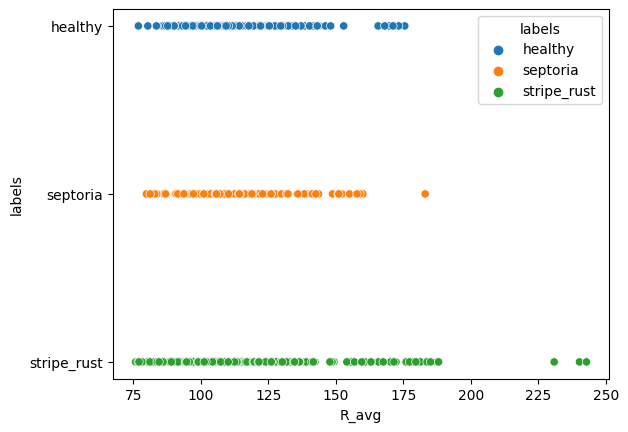

In [ ]:
import seaborn as sns
sns.scatterplot(x=meta_data_gabungan['R_avg'], y=meta_data_gabungan['labels'],
                hue=meta_data_gabungan['labels'])

<Axes: xlabel='G_avg', ylabel='labels'>

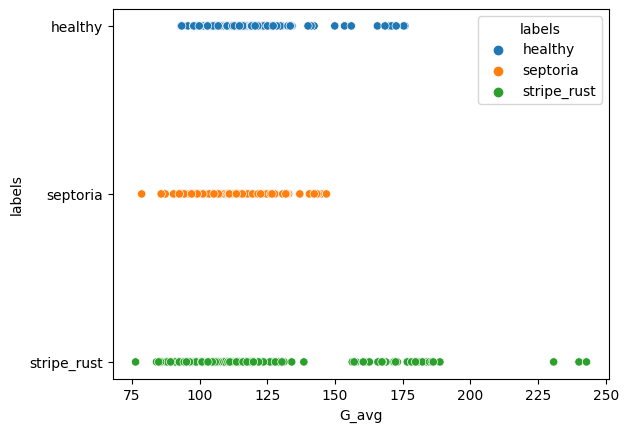

In [ ]:
import seaborn as sns
sns.scatterplot(x=meta_data_gabungan['G_avg'], y=meta_data_gabungan['labels'],
                hue=meta_data_gabungan['labels'])

<Axes: xlabel='B_avg', ylabel='labels'>

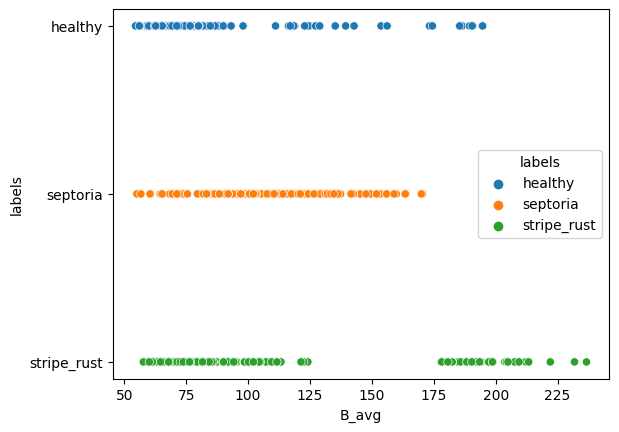

In [ ]:
import seaborn as sns
sns.scatterplot(x=meta_data_gabungan['B_avg'], y=meta_data_gabungan['labels'],
                hue=meta_data_gabungan['labels'])